In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font',family=font_name)
import matplotlib as mlp
mlp.rcParams['axes.unicode_minus'] = False

In [2]:
import mglearn

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
###
from sklearn.svm import SVC, SVR # 비선형 (분류, 회귀)
from sklearn.svm import LinearSVC, LinearSVR # 선형 (분류, 회귀)
### 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris, load_boston, load_breast_cancer
from sklearn.datasets import fetch_california_housing

In [3]:
from sklearn.tree import export_graphviz
import graphviz

In [4]:
import warnings
warnings.filterwarnings('ignore')

# 1. Naive Bayes
- 선형 모델과 유사(LogisticRegression, LinearSVC, ...)
- 훈련 속도가 빠르지만, 일반화 성능이 조금 뒤쳐진다.
- 훈련데이터의 종류
    - GausianNB: 연속적인 데이터
    - BernoulliNB: 이산적인 데이터
    - MultinomialNB: 이산적인 데이터
- 하이퍼 파라미터
    - var_smooth

## (1) GaussianNB

In [32]:
X, y= load_iris(return_X_y=True)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)

In [33]:
model= GaussianNB().fit(X_train, y_train)

In [34]:
pred= model.predict(X_test)
print('정확도:', accuracy_score(y_test, pred))

정확도: 0.9666666666666667


In [35]:
confusion_matrix(y_test, pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 12]], dtype=int64)

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## (2) MultinomialNB 와 BernoulliNB

In [40]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]
df= pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [41]:
#### type 특성을 숫자로 매핑

df['label']= df['type'].map({'positive':1, 'negative':0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [66]:
#### X,y로 나누기

X=df['movie_review']
y=df['label']

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv= CountVectorizer()

X_traincv= cv.fit_transform(X)
X_traincv

encoded_input= X_traincv.toarray()
encoded_input # 단어의 빈도수 (순서대로는 아님)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [49]:
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [50]:
cv.inverse_transform([encoded_input[0]])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [51]:
multi_model= MultinomialNB().fit(X_traincv, y)
bern_model= BernoulliNB().fit(X_traincv, y)

In [52]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

test_df= pd.DataFrame(test_feedback_list)
test_df

,movie_review,type
0,great great great movie ever,positive
1,I like this amazing movie,positive
2,my boyfriend said great movie ever,positive
3,cool cool cool,positive
4,awesome boyfriend said cool movie ever,positive
5,shame shame shame,negative
6,awesome director shame movie boring movie,negative
7,do not like this movie,negative
8,I do not like this boring movie,negative
9,aweful terrible boring movie,negative


In [53]:
test_df['label']= test_df['type'].map({'positive':1, 'negative':0})
test_df

,movie_review,type,label
0,great great great movie ever,positive,1
1,I like this amazing movie,positive,1
2,my boyfriend said great movie ever,positive,1
3,cool cool cool,positive,1
4,awesome boyfriend said cool movie ever,positive,1
5,shame shame shame,negative,0
6,awesome director shame movie boring movie,negative,0
7,do not like this movie,negative,0
8,I do not like this boring movie,negative,0
9,aweful terrible boring movie,negative,0


In [55]:
X_test= test_df['movie_review']
y_test= test_df['label']

In [56]:
X_testcv= cv.transform(X_test)

In [57]:
multi_pred= multi_model.predict(X_testcv)
bern_pred= bern_model.predict(X_testcv)

In [60]:
print('mulitnomial 정확도: ', accuracy_score(y_test, multi_pred))
print('bernoullli 정확도: ', accuracy_score(y_test, bern_pred))

mulitnomial 정확도:  1.0
bernoullli 정확도:  1.0


In [61]:
gauss_model= GaussianNB().fit(X_traincv, y)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

# 2. K-means

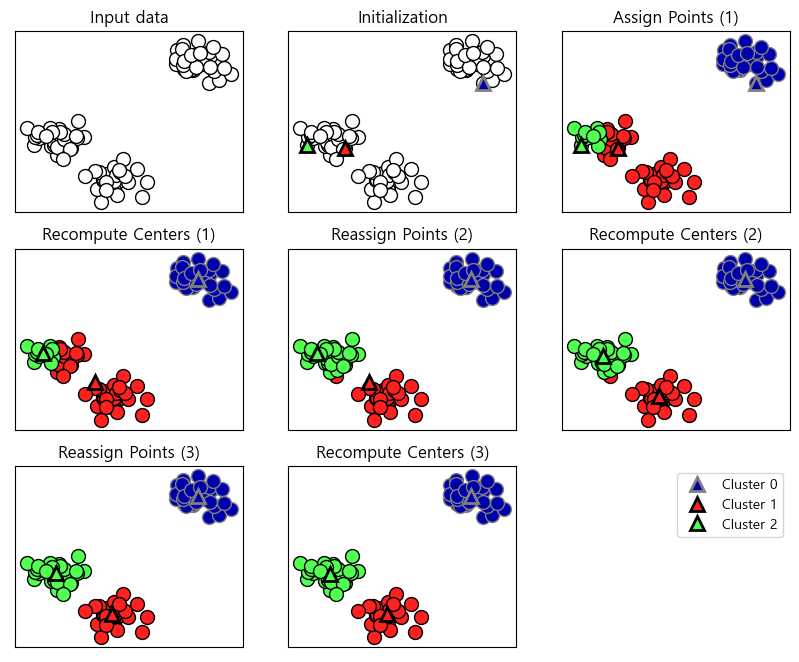

In [62]:
mglearn.plots.plot_kmeans_algorithm()

## (1) make_blobs sample

In [63]:
from sklearn.datasets import make_blobs

In [69]:
X, y= make_blobs()

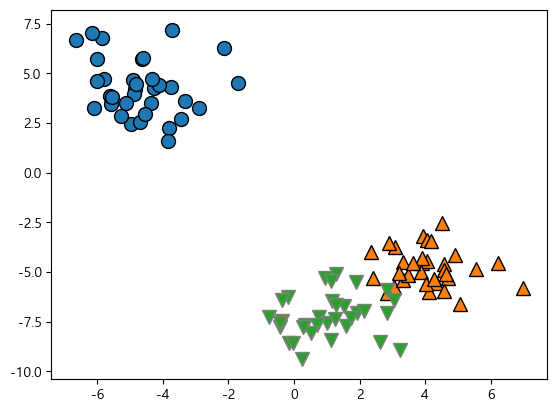

In [70]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.show()

In [77]:
model= KMeans(n_clusters=5).fit(X)

In [78]:
model.labels_

array([0, 4, 4, 3, 3, 1, 0, 0, 1, 2, 1, 0, 4, 1, 1, 2, 0, 1, 3, 4, 1, 1,
       2, 1, 2, 4, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 4, 2, 4, 3, 4,
       1, 4, 1, 1, 0, 2, 1, 3, 1, 1, 0, 4, 0, 1, 2, 3, 2, 2, 2, 2, 4, 2,
       1, 0, 2, 3, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 4, 4, 2, 0, 0, 2, 2,
       4, 1, 2, 2, 1, 0, 1, 1, 2, 4, 3, 4])

In [79]:
model.cluster_centers_ # 중심점

array([[ 0.60472616, -7.78529553],
       [-4.55817238,  3.63973608],
       [ 4.27014085, -4.72038169],
       [-4.9714287 ,  6.40134595],
       [ 2.03566986, -5.97232771]])

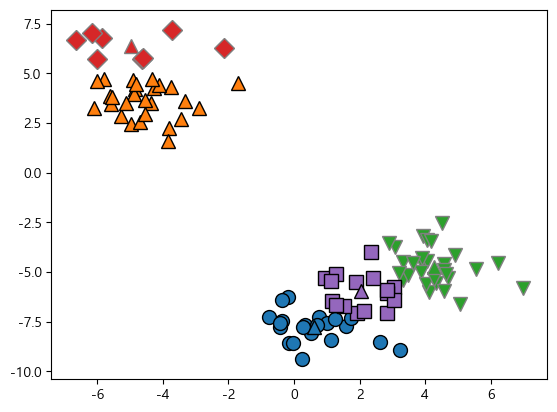

In [83]:
mglearn.discrete_scatter(X[:,0],X[:,1],model.labels_)
mglearn.discrete_scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], [0,1,2,3,4], markers='^')
plt.show()

## (2) iris sample

In [92]:
iris= load_iris()
X= pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
y= pd.DataFrame(iris.target, columns=['target'])

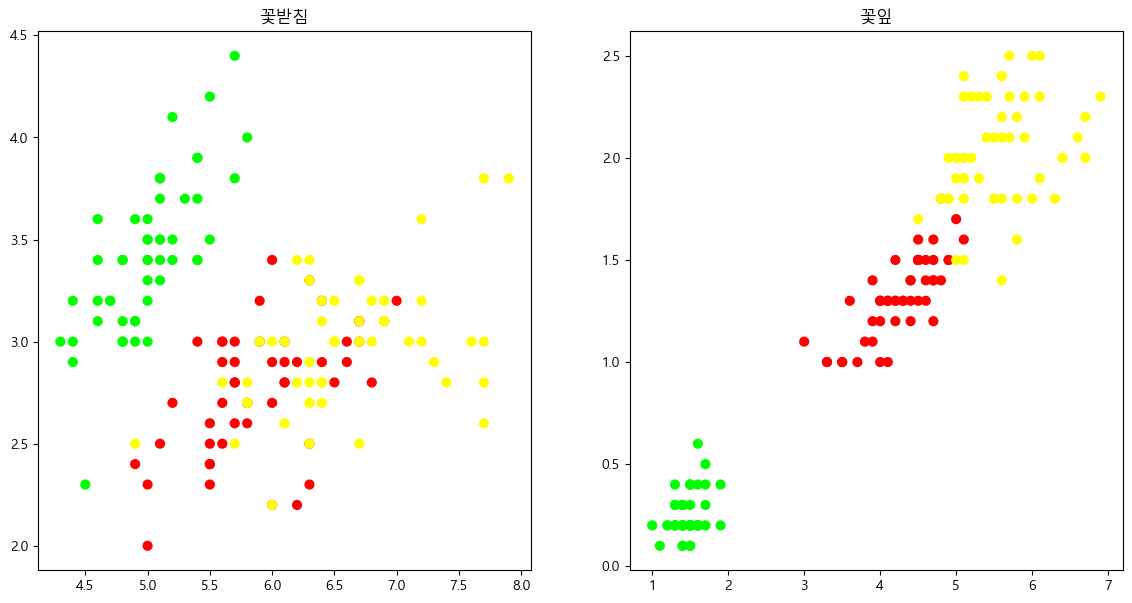

In [97]:
plt.figure(figsize=(14,7))
colormap=np.array(['lime','red','yellow'])

plt.subplot(1,2,1)
plt.scatter(X.sepal_length, X.sepal_width, c= colormap[y.target], s=40)
plt.title('꽃받침')

plt.subplot(1,2,2)
plt.scatter(X.petal_length, X.petal_width, c= colormap[y.target], s=40)
plt.title('꽃잎')

plt.show()

In [102]:
model= KMeans(n_clusters=3).fit(X)

In [103]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [104]:
accuracy_score(y, model.labels_)

0.8933333333333333

In [84]:
X, y= load_iris(return_X_y=True)

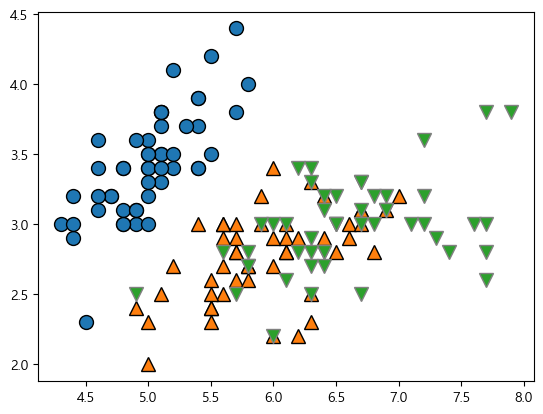

In [85]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.show()

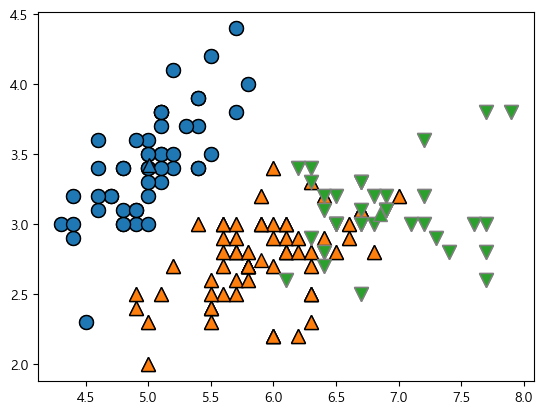

In [90]:
mglearn.discrete_scatter(X[:,0],X[:,1],model.labels_)
mglearn.discrete_scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], [0,1,2], markers='^')
plt.show()

## (3) 사람의 키와 몸무게를 활용

In [117]:
df = pd.DataFrame(columns=["height", "weight"])
df.loc[0] = [185, 60]
df.loc[1] = [180, 65]
df.loc[2] = [185, 75]
df.loc[3] = [165, 50]
df.loc[4] = [170, 58]
df.loc[5] = [155, 60]
df.loc[6] = [157, 57]
df.loc[7] = [162, 62]
df.loc[8] = [173, 70]
df.loc[9] = [171, 70]
df

,height,weight
0,185,60
1,180,65
2,185,75
3,165,50
4,170,58
5,155,60
6,157,57
7,162,62
8,173,70
9,171,70


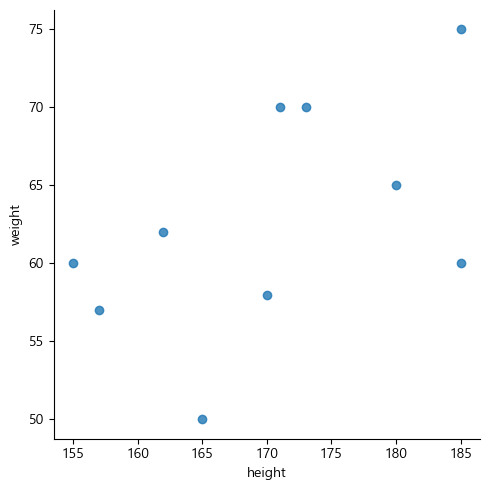

In [115]:
plt.close()
sns.lmplot('height','weight',data=df, fit_reg=False)
plt.show()

In [120]:
model= KMeans(n_clusters=3).fit(df.values)
df['label']= model.labels_

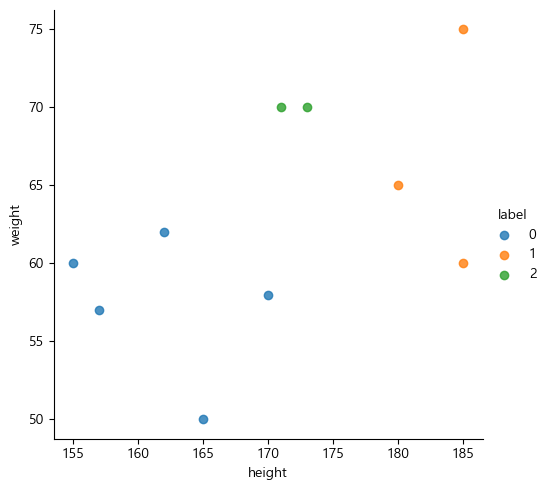

In [121]:
sns.lmplot('height','weight',data=df, fit_reg=False, hue='label')
plt.show()

In [114]:
X= df[['height','weight']]
X

,height,weight
0,185,60
1,180,65
2,185,75
3,165,50
4,170,58
5,155,60
6,157,57
7,162,62
8,173,70
9,171,70


## (4) 소비자 데이터를 이용한 마케팅 분류

In [122]:
data= pd.read_csv('data/Cluster_Customers.csv')
data.head()

,ID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [125]:
X= data[['Income', 'Spend']] 
X= data.iloc[:, [3,4]]
X

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [126]:
# 중심값 찾기

wcss=[]
for i in range(1,21):
    model= KMeans(n_clusters=i)
    model.fit_transform(X)
    wcss.append(model.inertia_) # L2 거리값
wcss

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37265.86520484347,
 30273.39431207004,
 24990.434310396904,
 22131.92051101073,
 19634.55462934998,
 17633.878680834292,
 16048.4731749159,
 14292.543823365126,
 13577.514882876982,
 12152.54959207459,
 10809.560255430843,
 10099.981099697405,
 9407.739846754554,
 8709.889328916697,
 8365.902758907761]

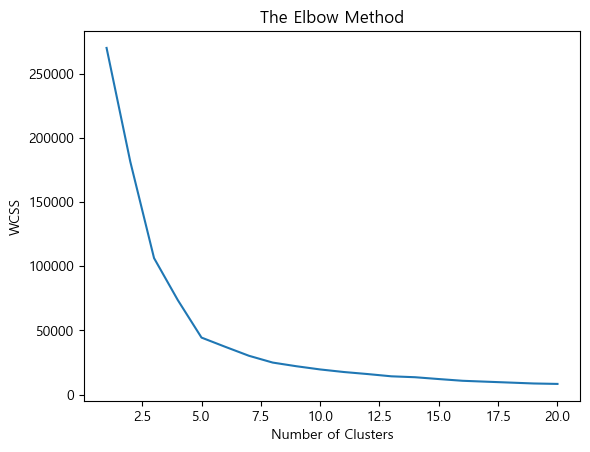

In [131]:
plt.close()
plt.figure()
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [132]:
k=5
model=KMeans(n_clusters=k)
pred=model.fit_predict(X)
pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [135]:
group_cluster= pd.DataFrame(pred)
group_cluster.columns= ['Group']
full_data= pd.concat([data, group_cluster], axis=1)
full_data

,ID,Gender,Age,Income,Spend,Group
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [136]:
model= KMeans(n_clusters=5, random_state=42).fit(X)
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [139]:
model.predict([[100,50],[10,10]])

array([4, 2])

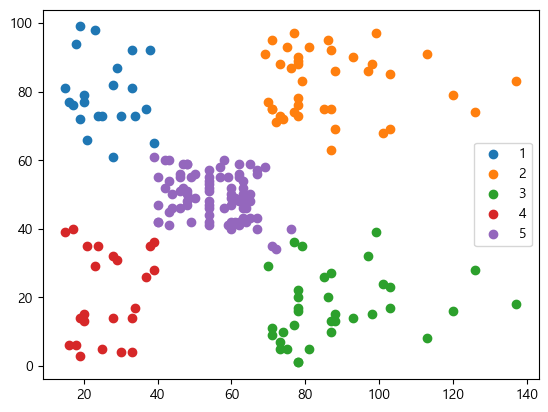

In [142]:
X= np.array(X)
labels=['1','2','3','4','5']
for i in range(5):
    plt.scatter(X[pred==i,0], X[pred==i,1], label=labels[i])

plt.legend()
plt.show()

# 3. 연관 규칙 분석(Association rule)
- pip install apyori

In [5]:
!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=24e59133049c5c8a3282ef1d540e71fb1fbd129553935df018b58672b651dc75
  Stored in directory: c:\users\acorn\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [6]:
from apyori import apriori

In [7]:
?apriori

In [14]:
data= pd.read_csv('data/Association_Basket.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


#### 트랜젝션 데이터로 변경

In [24]:
transactions= []
for i in range(data.shape[0]):
    transactions.append([data[j][i]
        for j in range(data.shape[1]-data.isnull().sum(axis=1)[i])])

In [20]:
len(data.loc[2])

20

In [23]:
data.isnull().sum(axis=1)

0        0
1       17
2       19
3       18
4       15
        ..
7496    17
7497    14
7498    19
7499    18
7500    16
Length: 7501, dtype: int64

In [27]:
for i in transactions:
    print(len(i))

20
3
1
2
5
1
2
3
3
1
2
1
5
3
2
1
7
2
10
5
7
2
6
8
1
6
9
1
5
4
4
4
3
3
1
4
2
3
3
3
1
8
1
4
1
8
4
2
2
3
5
3
2
2
3
2
11
2
7
6
1
1
1
5
2
1
2
7
1
2
5
3
1
1
2
1
3
2
5
1
3
5
4
6
1
2
2
1
2
4
1
12
2
1
6
4
8
3
1
6
3
8
9
4
5
6
4
10
8
8
4
4
4
4
5
6
2
2
9
1
1
3
3
1
2
12
4
6
1
1
1
2
1
7
12
1
1
5
3
8
11
11
8
9
1
3
10
1
2
4
6
5
1
4
1
6
1
9
7
5
5
2
1
1
5
2
13
1
1
5
5
2
5
8
5
1
3
4
2
3
1
8
2
3
3
2
1
5
11
2
5
9
3
5
2
1
1
1
3
9
1
1
8
2
2
1
8
3
3
6
4
3
5
1
3
5
2
1
1
2
2
1
4
2
8
5
7
10
5
6
1
2
2
2
4
2
9
4
4
1
2
1
1
2
9
7
7
3
4
1
4
6
1
1
3
2
4
1
4
3
2
4
2
1
1
2
1
1
6
5
7
4
6
7
5
2
6
2
1
1
1
1
4
3
2
2
3
1
2
1
4
3
6
4
11
7
1
2
3
9
6
5
5
4
7
8
3
8
2
2
1
1
1
2
2
3
4
10
3
5
3
3
2
2
8
1
4
5
3
1
4
1
2
7
2
10
1
3
6
2
4
3
3
1
4
3
3
1
2
3
4
2
2
3
3
3
6
10
2
2
5
2
3
1
4
1
1
1
8
2
3
1
2
7
5
2
2
1
7
2
4
1
1
1
6
2
4
3
9
4
3
1
2
11
1
3
7
1
5
1
2
2
1
2
1
3
1
1
8
1
5
3
6
1
8
2
1
2
4
6
1
8
6
1
2
1
1
1
3
4
1
5
5
5
2
6
2
6
2
3
1
3
2
2
3
5
9
2
3
1
1
1
3
9
1
6
10
1
8
1
9
8
7
5
1
2
4
5
8
7
2
10
11
3
4
4
11
9
3
12
2
7
3
7
1
1
2
9
5

In [40]:
rules= apriori(transactions, min_support=0.015, min_confidence=0.2, min_lift=1, min_length=1) # 지지도, 신뢰도, 향상도

In [41]:
result= list(rules)

In [42]:
print(len(result))

78


In [43]:
df= pd.DataFrame(result)
df

,items,support,ordered_statistics
0,(mineral water),0.238368,"[((), (mineral water), 0.23836821757099053, 1.0)]"
1,"(burgers, eggs)",0.028796,"[((burgers), (eggs), 0.33027522935779813, 1.83..."
2,"(burgers, french fries)",0.021997,"[((burgers), (french fries), 0.252293577981651..."
3,"(burgers, green tea)",0.017464,"[((burgers), (green tea), 0.2003058103975535, ..."
4,"(burgers, milk)",0.017864,"[((burgers), (milk), 0.20489296636085627, 1.58..."
...,...,...,...
73,"(spaghetti, tomatoes)",0.020931,"[((tomatoes), (spaghetti), 0.3060428849902534,..."
74,"(spaghetti, turkey)",0.016531,"[((turkey), (spaghetti), 0.26439232409381663, ..."
75,"(chocolate, mineral water, spaghetti)",0.015865,"[((chocolate, mineral water), (spaghetti), 0.3..."
76,"(mineral water, spaghetti, ground beef)",0.017064,"[((mineral water, ground beef), (spaghetti), 0..."


In [44]:
df.to_csv('data/apriori_result.csv')

In [45]:
print(df.iloc[6:19][['items','support']])

                             items   support
6             (burgers, spaghetti)  0.021464
7                     (eggs, cake)  0.019064
8             (french fries, cake)  0.017864
9            (mineral water, cake)  0.027463
10               (spaghetti, cake)  0.018131
11        (chicken, mineral water)  0.022797
12            (chicken, spaghetti)  0.017198
13               (chocolate, eggs)  0.033196
14           (chocolate, escalope)  0.017598
15       (chocolate, french fries)  0.034395
16  (chocolate, frozen vegetables)  0.022930
17        (chocolate, ground beef)  0.023064
18               (chocolate, milk)  0.032129


In [46]:
ar= df.iloc[1:74]['items']

In [47]:
ar

1                       (burgers, eggs)
2               (burgers, french fries)
3                  (burgers, green tea)
4                       (burgers, milk)
5              (burgers, mineral water)
                    ...                
69    (whole wheat rice, mineral water)
70               (spaghetti, olive oil)
71                (spaghetti, pancakes)
72                  (shrimp, spaghetti)
73                (spaghetti, tomatoes)
Name: items, Length: 73, dtype: object

In [48]:
df1= pd.DataFrame(list(ar), columns=['FROM','TO'])
df1

,FROM,TO
0,burgers,eggs
1,burgers,french fries
2,burgers,green tea
3,burgers,milk
4,burgers,mineral water
...,...,...
68,whole wheat rice,mineral water
69,spaghetti,olive oil
70,spaghetti,pancakes
71,shrimp,spaghetti


In [51]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [52]:
G= nx.from_pandas_edgelist(df1, source='FROM', target='TO')

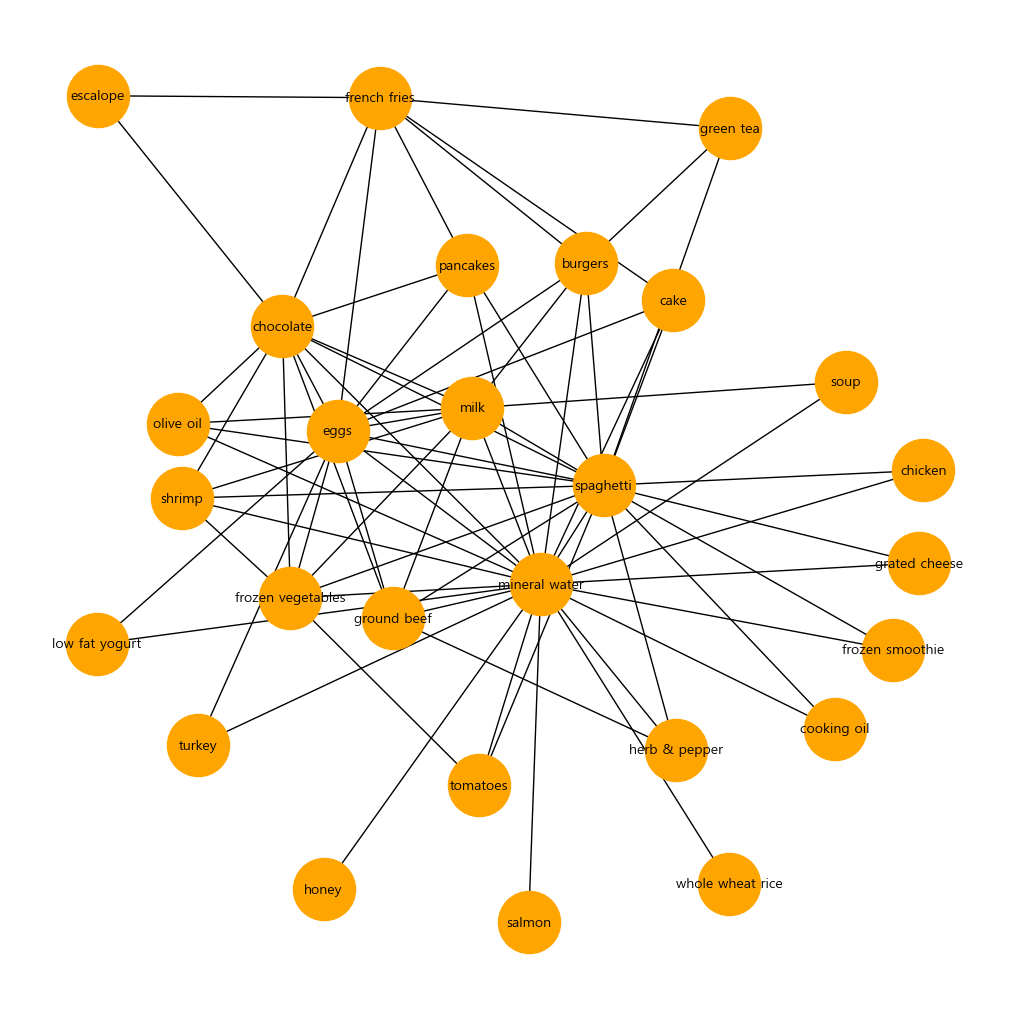

In [54]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(G)
pos= nx.kamada_kawai_layout(G)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_family= font_name)
nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=2000, alpha=1)

# 4. 네트워크 분석

In [55]:
data= pd.read_csv('data/Network1_work.csv', encoding='euc-kr')
data.head()

,FROM,TO
0,기획이사,개발팀장A
1,기획이사,기획디자이너A
2,기획이사,연구대리
3,관리이사,교육대리A
4,관리이사,교육사원


In [56]:
G= nx.from_pandas_edgelist(data, source='FROM', target='TO')

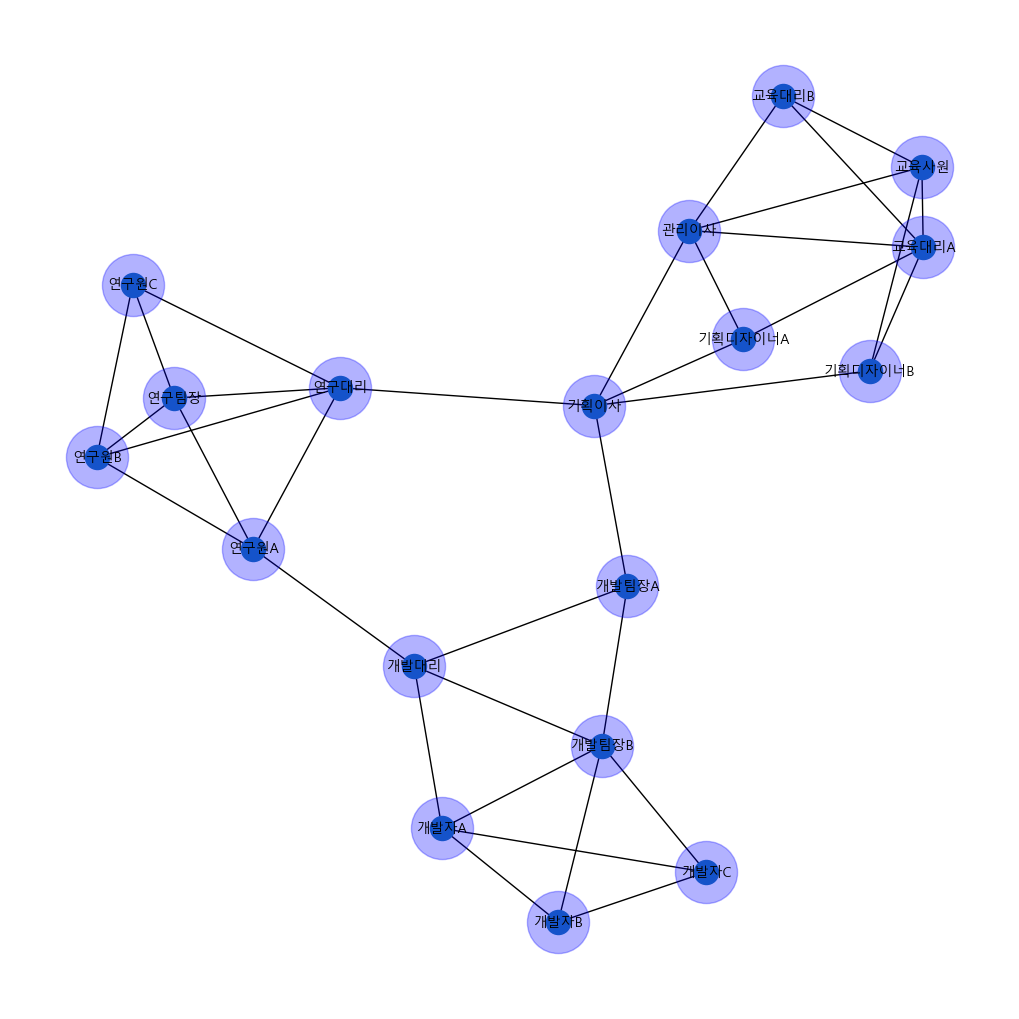

In [57]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(G)
pos= nx.kamada_kawai_layout(G)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_family= font_name)
nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=2000, alpha=0.3)

In [62]:
# 1. 연결 중심성
dgr= nx.degree_centrality(G)
dgr

# 2. 매개 중심성
btw= nx.betweenness_centrality(G)

# 3. 근접 중심성
cls= nx.closeness_centrality(G)

# 4. 페이지 랭크
pgr= nx.pagerank(G)
pgr

{'기획이사': 0.06892434114496408,
 '개발팀장A': 0.044510039939061635,
 '기획디자이너A': 0.04344731969836747,
 '연구대리': 0.06828353052358535,
 '관리이사': 0.06851771480428259,
 '교육대리A': 0.06911322915627127,
 '교육사원': 0.056538161232039336,
 '연구팀장': 0.0562265730507787,
 '연구원A': 0.05607899197555745,
 '연구원B': 0.0562265730507787,
 '연구원C': 0.04383741373081455,
 '개발팀장B': 0.07186937158151391,
 '개발대리': 0.05760652837134822,
 '개발자A': 0.05894909418445082,
 '개발자B': 0.04615649853381233,
 '개발자C': 0.04615649853381233,
 '교육대리B': 0.04374448236706473,
 '기획디자이너B': 0.043813638121496426}

In [63]:
import operator

sort_dgr= sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sort_btw= sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sort_cls= sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sort_pgr= sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)


In [65]:
sort_btw

[('기획이사', 0.5259978991596639),
 ('개발팀장A', 0.2698704481792717),
 ('연구대리', 0.2379201680672269),
 ('개발팀장B', 0.19467787114845936),
 ('개발대리', 0.1786589635854342),
 ('관리이사', 0.1691176470588235),
 ('연구원A', 0.14189425770308123),
 ('기획디자이너B', 0.07352941176470587),
 ('개발자A', 0.04061624649859944),
 ('기획디자이너A', 0.029411764705882342),
 ('교육대리A', 0.017156862745098037),
 ('연구팀장', 0.013392857142857142),
 ('연구원B', 0.013392857142857142),
 ('교육사원', 0.006127450980392156),
 ('연구원C', 0.0),
 ('개발자B', 0.0),
 ('개발자C', 0.0),
 ('교육대리B', 0.0)]

In [67]:
a=[sort_btw, sort_cls, sort_dgr, sort_pgr]
b=list(map(list, zip(*a)))

pd.DataFrame(b, columns=['연결중심성','매개중심성','근접중심성','페이지링크'])

,연결중심성,매개중심성,근접중심성,페이지링크
0,"(기획이사, 0.5259978991596639)","(기획이사, 0.53125)","(기획이사, 0.29411764705882354)","(개발팀장B, 0.07186937158151391)"
1,"(개발팀장A, 0.2698704481792717)","(개발팀장A, 0.4594594594594595)","(연구대리, 0.29411764705882354)","(교육대리A, 0.06911322915627127)"
2,"(연구대리, 0.2379201680672269)","(연구대리, 0.4473684210526316)","(관리이사, 0.29411764705882354)","(기획이사, 0.06892434114496408)"
3,"(개발팀장B, 0.19467787114845936)","(개발대리, 0.425)","(교육대리A, 0.29411764705882354)","(관리이사, 0.06851771480428259)"
4,"(개발대리, 0.1786589635854342)","(관리이사, 0.4146341463414634)","(개발팀장B, 0.29411764705882354)","(연구대리, 0.06828353052358535)"
5,"(관리이사, 0.1691176470588235)","(연구원A, 0.4146341463414634)","(교육사원, 0.23529411764705882)","(개발자A, 0.05894909418445082)"
6,"(연구원A, 0.14189425770308123)","(기획디자이너A, 0.3953488372093023)","(연구팀장, 0.23529411764705882)","(개발대리, 0.05760652837134822)"
7,"(기획디자이너B, 0.07352941176470587)","(개발팀장B, 0.3953488372093023)","(연구원A, 0.23529411764705882)","(교육사원, 0.056538161232039336)"
8,"(개발자A, 0.04061624649859944)","(기획디자이너B, 0.3953488372093023)","(연구원B, 0.23529411764705882)","(연구팀장, 0.0562265730507787)"
9,"(기획디자이너A, 0.029411764705882342)","(연구팀장, 0.3695652173913043)","(개발대리, 0.23529411764705882)","(연구원B, 0.0562265730507787)"
